# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 20.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
273235,0.3247,0.0024,0.0024,0.0024,0.0024,0.0122,0.0732,0.2344,0.0024,0.1563,0,0,0,0
19003,0.5493,0.4663,0.3296,0.1025,0.0708,0.2612,1.6187,0.7568,0.4077,0.6494,3,3,3,3
143057,0.5396,0.0024,0.0024,0.0024,0.0024,0.0024,0.0317,0.3833,0.0024,0.0024,9,0,5,0
153333,0.7715,0.0024,0.0024,0.0024,0.0024,0.0049,0.0366,0.3076,0.0024,0.0024,0,0,0,0
293326,1.7627,0.3320,0.4541,0.5493,0.2051,0.3003,0.6934,1.4038,0.4517,0.8984,3,3,6,6


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469983 entries, 0 to 469982
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          469983 non-null  float64
 1   Emg2          469983 non-null  float64
 2   Emg3          469983 non-null  float64
 3   Emg4          469983 non-null  float64
 4   Emg5          469983 non-null  float64
 5   Emg6          469983 non-null  float64
 6   Emg7          469983 non-null  float64
 7   Emg8          469983 non-null  float64
 8   Emg9          469983 non-null  float64
 9   Emg10         469983 non-null  float64
 10  repetition    469983 non-null  int64  
 11  rerepetition  469983 non-null  int64  
 12  stimulus      469983 non-null  int64  
 13  restimulus    469983 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.2 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000
mean,0.519579,0.168986,0.110115,0.065947,0.035622,0.079689,0.445016,0.400604,0.146198,0.265693,3.157821,2.165272,5.597981,4.009179
std,0.555217,0.341448,0.236890,0.151314,0.078130,0.170031,0.786864,0.443671,0.346554,0.435951,3.483234,3.229908,6.578078,6.248982
min,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144000,0.002400,0.002400,0.002400,0.002400,0.002400,0.026900,0.151400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.383300,0.002400,0.002400,0.002400,0.002400,0.007300,0.114700,0.249000,0.002400,0.078100,2.000000,0.000000,3.000000,0.000000
75%,0.688500,0.166000,0.117200,0.053700,0.026900,0.073200,0.488300,0.444300,0.131800,0.312500,6.000000,4.000000,10.000000,7.000000
max,4.668000,4.438500,3.168900,2.612300,1.079100,1.953100,4.665500,4.668000,4.660600,4.663100,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     200142
12     15607
2      15597
7      15595
4      15591
8      15588
9      15585
11     15572
6      15563
5      15543
10     15525
1      15524
3      15524
17     10407
14     10407
13     10406
15     10380
16     10328
19      5204
21      5202
18      5200
22      5171
23      5162
20      5160
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.952798,-0.547708,-0.513029,-0.472837,-0.478691,-0.410747,-0.345969,-0.735177,-0.466575,-0.472407
1,-0.952798,-0.547708,-0.513029,-0.472837,-0.478691,-0.357587,-0.360316,-0.745428,-0.466575,-0.477528
2,-0.952798,-0.547708,-0.513029,-0.472837,-0.478691,-0.317989,-0.389126,-0.760701,-0.466575,-0.493104
3,-0.952798,-0.547708,-0.513029,-0.472837,-0.478691,-0.344569,-0.423464,-0.775973,-0.466575,-0.519135
4,-0.952798,-0.547708,-0.513029,-0.472837,-0.478691,-0.370606,-0.452274,-0.786224,-0.466575,-0.540045
...,...,...,...,...,...,...,...,...,...,...
383865,-0.429773,-0.547708,-0.379412,-0.472837,-0.478691,-0.397185,-0.489551,-0.398143,-0.421097,-0.545165
383866,-0.433821,-0.540921,-0.398556,-0.472837,-0.478691,-0.410747,-0.495314,-0.418436,-0.421097,-0.534924
383867,-0.417461,-0.547708,-0.436453,-0.472837,-0.478691,-0.423765,-0.506838,-0.454211,-0.427480,-0.545165
383868,-0.413244,-0.547708,-0.446220,-0.472837,-0.478691,-0.463363,-0.524006,-0.500236,-0.440512,-0.566075


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
76/76 [==============================] - 3s 30ms/step - loss: 1.3540 - accuracy: 0.6498 - val_loss: 0.9455 - val_accuracy: 0.7445
Epoch 2/100
76/76 [==============================] - 2s 30ms/step - loss: 0.8508 - accuracy: 0.7701 - val_loss: 0.7307 - val_accuracy: 0.8006
Epoch 3/100
76/76 [==============================] - 2s 25ms/step - loss: 0.6938 - accuracy: 0.8076 - val_loss: 0.6820 - val_accuracy: 0.8176
Epoch 4/100
76/76 [==============================] - 2s 25ms/step - loss: 0.6178 - accuracy: 0.8273 - val_loss: 0.5884 - val_accuracy: 0.8372
Epoch 5/100
76/76 [==============================] - 2s 26ms/step - loss: 0.5625 - accuracy: 0.8415 - val_loss: 0.5246 - val_accuracy: 0.8516
Epoch 6/100
76/76 [==============================] - 2s 26ms/step - loss: 0.5232 - accuracy: 0.8519 - val_loss: 0.4875 - val_accuracy: 0.8614
Epoch 7/100
76/76 [==============================] - 2s 25ms/step - loss: 0.4960 - accuracy: 0.8587 - val_loss: 0.4616 - val_accuracy: 0.8681
Epoch 

76/76 [==============================] - 2s 26ms/step - loss: 0.1493 - accuracy: 0.9580 - val_loss: 0.2013 - val_accuracy: 0.9465
Epoch 59/100
76/76 [==============================] - 2s 26ms/step - loss: 0.1620 - accuracy: 0.9546 - val_loss: 0.1748 - val_accuracy: 0.9516
Epoch 60/100
76/76 [==============================] - 2s 27ms/step - loss: 0.1450 - accuracy: 0.9594 - val_loss: 0.1747 - val_accuracy: 0.9515
Epoch 61/100
76/76 [==============================] - 2s 28ms/step - loss: 0.1494 - accuracy: 0.9579 - val_loss: 0.1759 - val_accuracy: 0.9518
Epoch 62/100
76/76 [==============================] - 2s 26ms/step - loss: 0.1426 - accuracy: 0.9598 - val_loss: 0.1736 - val_accuracy: 0.9518
Epoch 63/100
76/76 [==============================] - 2s 26ms/step - loss: 0.1418 - accuracy: 0.9598 - val_loss: 0.1717 - val_accuracy: 0.9526
Epoch 64/100
76/76 [==============================] - 2s 27ms/step - loss: 0.1406 - accuracy: 0.9602 - val_loss: 0.1718 - val_accuracy: 0.9525
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

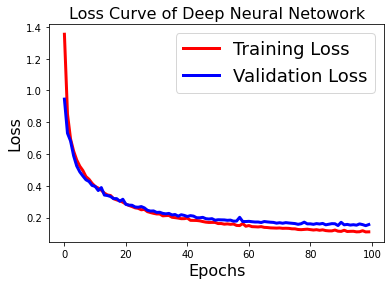

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

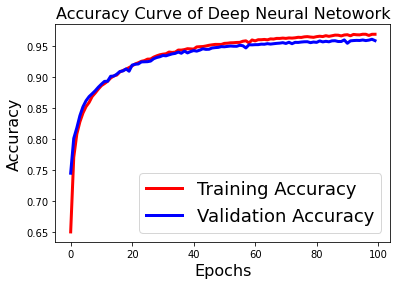

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 0,  7, 21, ...,  0,  0,  0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

7

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 95.83061974105817


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     39905
           1       0.96      0.96      0.96      2026
           2       0.98      0.90      0.94      1975
           3       0.96      0.95      0.96      1946
           4       0.97      0.93      0.95      1879
           5       0.92      0.94      0.93      1902
           6       0.96      0.94      0.95      2223
           7       0.93      0.96      0.95      2014
           8       0.96      0.90      0.93      2031
           9       0.94      0.90      0.92      2112
          10       0.92      0.88      0.90      2062
          11       0.95      0.93      0.94      2170
          12       0.92      0.85      0.88      2160
          13       0.96      0.93      0.95      1517
          14       0.93      0.90      0.92      1419
          15       0.94      0.91      0.92      1307
          16       0.97      0.93      0.95      1635
 

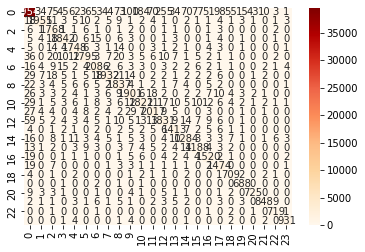

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.34722692578216585
MSE: 4.081668273113293
RMSE: 2.020313904598316


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9582300143305832
Recall Score :  0.9583061974105818
f1_score :  0.9579363394592396
